✅ First 5 rows of dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrm

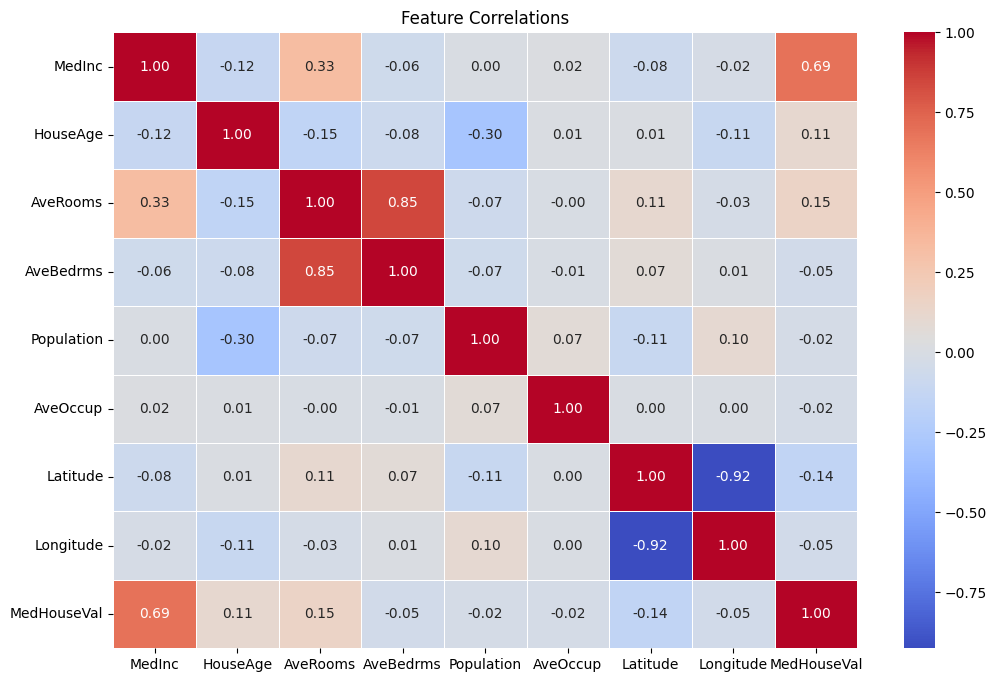


📊 Model Performance:
✅ R² Score: 0.46
✅ Mean Absolute Error (MAE): 0.62
✅ Mean Squared Error (MSE): 0.70
✅ Root Mean Squared Error (RMSE): 0.84


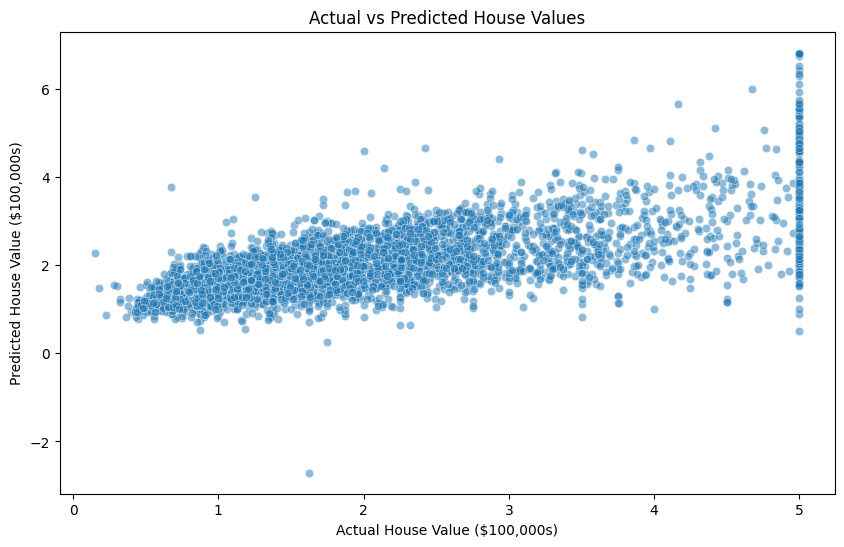

In [1]:
"""
📌 California Housing Price Prediction 🏠
This script loads the California Housing dataset, explores the data, trains a 
Linear Regression model, evaluates performance, and visualizes results.
"""
# SECTION 1
# ✅ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ Load Dataset
data = fetch_california_housing(as_frame=True)
df = data.frame  # Convert to Pandas DataFrame

print("✅ First 5 rows of dataset:")
print(df.head())

# ✅ Exploratory Data Analysis (EDA)
print("\n🔍 Dataset Info:")
df.info()

print("\n🛠 Missing Values:")
print(df.isnull().sum())

print("\n📊 Summary Statistics:")
print(df.describe())

# SECTION 2
# ✅ Data Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()

# SECTION 3
# ✅ Feature Selection
features = ["MedInc", "AveRooms"]  # Selecting important features
target = "MedHouseVal"
X = df[features]
y = df[target]

# ✅ Train-Test Split (80% Train / 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SECTION 4
# ✅ Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Predictions
y_pred = model.predict(X_test)

# ✅ Model Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n📊 Model Performance:")
print(f"✅ R² Score: {r2:.2f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")

# ✅ Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual House Value ($100,000s)")
plt.ylabel("Predicted House Value ($100,000s)")
plt.title("Actual vs Predicted House Values")
plt.show()
